In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

%matplotlib inline

Напомним, что магическая функция %matplotlib inline позволяет отображать графики без вызова метода plt.show()

На приведенном ниже примере представлены сигналы в аналоговой, дискретной и квантованной форме.

Шаг 1: создать ряд временных значений: Функция np.linspace(start, stop, num) задает вектор в диапазоне [start, stop], а num - количество точек в диапазоне.

Шаг 2: создать сигнал произвольной формы: С помощью функции np.sin() задаём сигнал из набора гармонических воздействий. Для простоты амплитуды всех компонент равны 1, а смещение по фазе нулевое.

Шаг 3 Отрисовка графиков. Методы matplotlib задают различный стиль отображения:

plot() - стандартный график, выводит сигнал в аналоговой форме,
stem() - график в виде отсчетов, выводит сигнал в дискретной форме,
step() - график в виде уровней, выводит сигнал в квантованной форме.
Для уменьшения количества кода создана вспомогательная функция plt_sel(s, *args, **kwargs), которая выбирает стиль отображения графика. Аргументы *args передают значения по осям ординат и абсцисс, **kwargs используется для передачи параметров в метод stem().

In [3]:
n = 40
# time vector
t = np.linspace(0, 1, n, endpoint=True)
# sine wave
x = np.sin(np.pi*t) + np.sin(2*np.pi*t) + np.sin(3*np.pi*t) + np.sin(5*np.pi*t)

# Select: plot, stem, bar
def plt_sel(s, *args, **kwargs):
    if s == 0:
        return plt.plot(*args)
    if s == 1:
        return plt.stem(*args, **kwargs)
    if s == 2:
        return plt.step(*args)

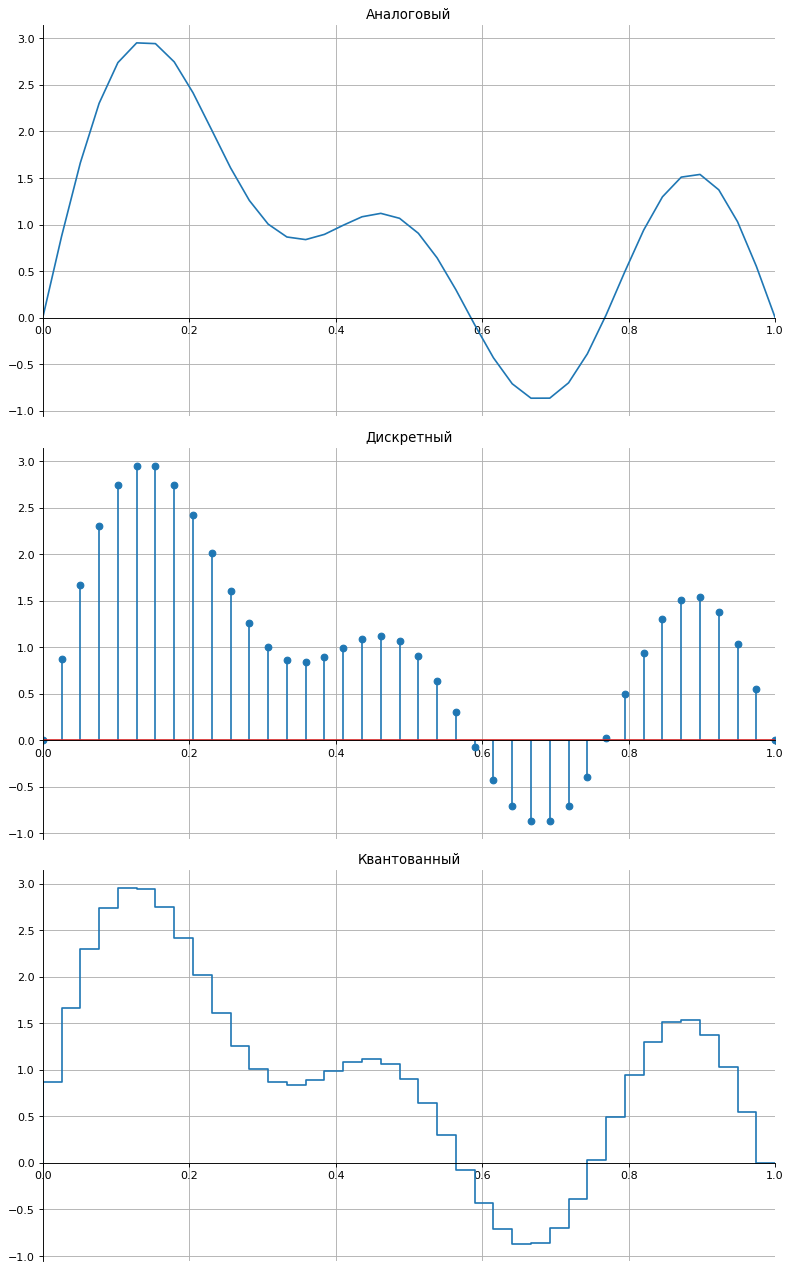

In [7]:
# Subplot titles
t_titles = ['Аналоговый', 'Дискретный', 'Квантованный']

# Plot figures
fig = plt.figure(figsize=(10, 16), dpi=80)
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.title(t_titles[i]) 
    plt_sel(i, t, x, use_line_collection=True)
    plt.xlim([0, 1])
    plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
    plt.grid(True)
    
    # change plot view
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
plt.tight_layout()